In [42]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [44]:
url="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir=tf.keras.utils.get_file("cats_and_dogs_filtered.zip",origin=url,extract=True)

In [45]:
base_dir=os.path.join(os.path.dirname(zip_dir),"cats_and_dogs_filtered")
train_dir=os.path.join(base_dir,"train")
val_dir=os.path.join(base_dir,"validation")

In [46]:
train_cats_dir=os.path.join(train_dir,"cats")
train_dogs_dir=os.path.join(train_dir,"dogs")
val_cats_dir=os.path.join(val_dir,"cats")
val_dogs_dir=os.path.join(val_dir,"dogs")

In [47]:
target_size_img=(64,64)
train_img_gen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True,zoom_range=0.15,rotation_range=30,
                                width_shift_range=0.175,height_shift_range=0.175,fill_mode="nearest")
train_gen=train_img_gen.flow_from_directory(train_dir,shuffle=True,target_size=target_size_img,class_mode="binary")

Found 2000 images belonging to 2 classes.


In [48]:
val_img_gen=ImageDataGenerator(rescale=1/255)
val_gen=val_img_gen.flow_from_directory(val_dir,shuffle=True,target_size=target_size_img,class_mode="binary")

Found 1000 images belonging to 2 classes.


In [49]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)        

In [51]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [57]:
cb_save=ModelCheckpoint("dogs-vs-cats/model",save_best_only=True,monitor="val_accuracy")

In [61]:
his=model.fit(train_gen,epochs=100,validation_data=val_gen,callbacks=[cb_save],verbose=2,steps_per_epoch=32)
print("Trained")

Epoch 1/100
32/32 - 4s - loss: 0.4928 - accuracy: 0.7579 - val_loss: 0.6809 - val_accuracy: 0.6750
Epoch 2/100
32/32 - 4s - loss: 0.4940 - accuracy: 0.7529 - val_loss: 0.6826 - val_accuracy: 0.6840
Epoch 3/100
32/32 - 4s - loss: 0.4679 - accuracy: 0.7758 - val_loss: 0.9290 - val_accuracy: 0.5530
Epoch 4/100
32/32 - 4s - loss: 0.5078 - accuracy: 0.7401 - val_loss: 0.5832 - val_accuracy: 0.6750
Epoch 5/100
32/32 - 4s - loss: 0.5009 - accuracy: 0.7560 - val_loss: 0.5481 - val_accuracy: 0.7350
INFO:tensorflow:Assets written to: dogs-vs-cats/model/assets
Epoch 6/100
32/32 - 4s - loss: 0.5075 - accuracy: 0.7559 - val_loss: 0.5730 - val_accuracy: 0.7200
Epoch 7/100
32/32 - 4s - loss: 0.4836 - accuracy: 0.7718 - val_loss: 0.5378 - val_accuracy: 0.7250
Epoch 8/100
32/32 - 4s - loss: 0.5336 - accuracy: 0.7460 - val_loss: 0.7413 - val_accuracy: 0.5770
Epoch 9/100
32/32 - 4s - loss: 0.4725 - accuracy: 0.7646 - val_loss: 0.6971 - val_accuracy: 0.6470
Epoch 10/100
32/32 - 4s - loss: 0.4815 - accurac

Epoch 80/100
32/32 - 4s - loss: 0.4665 - accuracy: 0.7679 - val_loss: 0.5083 - val_accuracy: 0.7640
Epoch 81/100
32/32 - 4s - loss: 0.4397 - accuracy: 0.7959 - val_loss: 0.5184 - val_accuracy: 0.7470
Epoch 82/100
32/32 - 4s - loss: 0.4326 - accuracy: 0.8037 - val_loss: 0.6901 - val_accuracy: 0.7090
Epoch 83/100
32/32 - 4s - loss: 0.4625 - accuracy: 0.7927 - val_loss: 0.5391 - val_accuracy: 0.7490
Epoch 84/100
32/32 - 4s - loss: 0.4135 - accuracy: 0.8174 - val_loss: 0.5546 - val_accuracy: 0.7460
Epoch 85/100
32/32 - 4s - loss: 0.4346 - accuracy: 0.8096 - val_loss: 0.5578 - val_accuracy: 0.7610
Epoch 86/100
32/32 - 4s - loss: 0.4478 - accuracy: 0.7910 - val_loss: 0.6887 - val_accuracy: 0.6810
Epoch 87/100
32/32 - 4s - loss: 0.4030 - accuracy: 0.8125 - val_loss: 0.8647 - val_accuracy: 0.6230
Epoch 88/100
32/32 - 4s - loss: 0.4212 - accuracy: 0.8037 - val_loss: 0.5348 - val_accuracy: 0.7590
Epoch 89/100
32/32 - 4s - loss: 0.4424 - accuracy: 0.7842 - val_loss: 0.6637 - val_accuracy: 0.7200


In [62]:
his.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Accuracy')

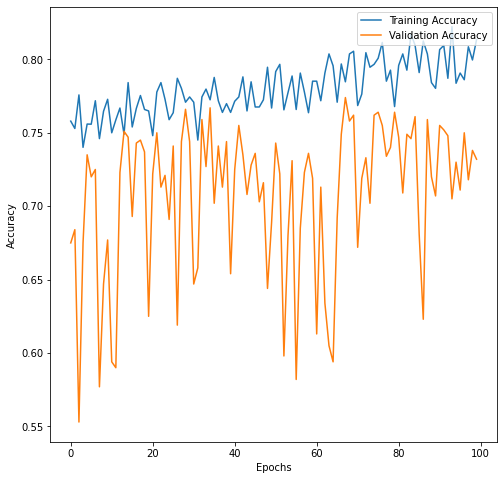

In [63]:
plt.figure(figsize=(8,8))
plt.plot(his.epoch,his.history["accuracy"],label="Training Accuracy")
plt.plot(his.epoch,his.history["val_accuracy"],label="Validation Accuracy")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

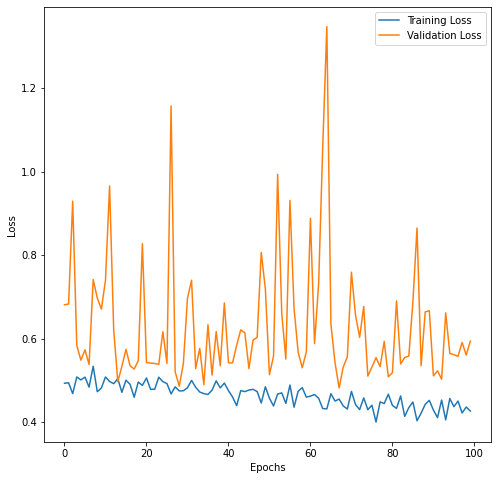

In [64]:
plt.figure(figsize=(8,8))
plt.plot(his.epoch,his.history["loss"],label="Training Loss")
plt.plot(his.epoch,his.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [67]:
meta_data=[his.history["val_accuracy"],his.history["val_loss"]]
data=pd.DataFrame(meta_data)
data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.675000,0.684000,0.553000,0.675000,0.735000,0.720000,0.725000,0.577000,0.647000,0.677000,...,0.755000,0.752000,0.748000,0.705000,0.730000,0.711000,0.75000,0.718000,0.73800,0.73200
1,0.680857,0.682563,0.928974,0.583224,0.548108,0.573036,0.537775,0.741271,0.697082,0.670456,...,0.510633,0.522546,0.502681,0.661292,0.564151,0.561428,0.55741,0.590553,0.56027,0.59368
